Dataset
Sales/Marketing (data preprocessing, feature encoding, advanced regression)
https://www.kaggle.com/competitions/home-data-for-ml-course/data   

# LOAD DATASET

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
from google.colab import files

# Upload your kaggle.json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!pip install kaggle

import os
import json

# Set Kaggle API credentials
kaggle_json = '/content/kaggle.json'
with open(kaggle_json, 'r') as file:
    kaggle_data = json.load(file)

os.environ['KAGGLE_USERNAME'] = kaggle_data['username']
os.environ['KAGGLE_KEY'] = kaggle_data['key']

In [ ]:
! kaggle competitions download -c home-data-for-ml-course

  0% 0.00/386k [00:00<?, ?B/s]
100% 386k/386k [00:00<00:00, 128MB/s]


In [ ]:
!unzip /content/home-data-for-ml-course.zip

Archive:  /content/home-data-for-ml-course.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: sample_submission.csv.gz  
  inflating: test.csv                
  inflating: test.csv.gz             
  inflating: train.csv               
  inflating: train.csv.gz            


## Load data latih

In [ ]:
train= pd.read_csv('/content/train.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Load data uji

In [ ]:
test= pd.read_csv('test.csv')

In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Gabungkan data latih dan data uji untuk preprocessing bersama

In [ ]:
# A new feature 'is_train' is created to simplify our work with the datasets.
train['is_train']  = True
test['is_train'] = False

# Both datasets are combined together in order to perform data preprocessing.
data_set = pd.concat([train, test], axis=0,sort=False)
data_set.reset_index(drop=True, inplace=True)

## Data Preprocessing

### Cek & handling missing value

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 404, dtype: int64


In [ ]:
# Cari kolom-kolom dengan missing value
missing_columns = data.columns[data.isnull().any()]

# Tampilkan hanya kolom-kolom dengan missing value beserta jumlah missing value
print(data[missing_columns].isnull().sum())

BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64


In [ ]:
# Find all features that have 50% or more of missing values.
missing = data_set.isna().sum()*100/data_set.shape[0]
missing = missing[missing > 50]

In [ ]:
# Drop these features since they do not carry a valuable insight.
for i in range(0,missing.shape[0]):
    data_set = data_set.drop([missing.index[i]],axis=1)

In [ ]:
# Next lines (35-91) are used to encode all categorical features into numeric ones.
# First, numeric values are assigned in numerical order. Later, we rearange these values
# in the way so it would be easier to describe them linearly.
data_set['MSZoning'].replace({'A':6,'C (all)':1,'FV':5,'I':7,'RH':3,'RL':4,'RP':8,'RM':2},inplace=True)
data_set['Street'].replace({'Grvl':1,'Pave':2},inplace=True)
data_set['LotShape'].replace({'Reg':1,'IR1':2,'IR2':4,'IR3':3},inplace=True)
data_set['LandContour'].replace({'Lvl':2,'Bnk':1,'HLS':4,'Low':3},inplace=True)
data_set['Utilities'].replace({'AllPub':1,'NoSewr':2,'NoSeWa':3,'ELO':3},inplace=True)
data_set['LotConfig'].replace({'Inside':2,'Corner':3,'CulDSac':5,'FR2':1,'FR3':4},inplace=True)
data_set['LandSlope'].replace({'Gtl':2,'Mod':3,'Sev':1},inplace=True)
data_set['Neighborhood'].replace({'Blmngtn':16,'Blueste':8,'BrDale':3,'BrkSide':4,'ClearCr':19,\
                                  'CollgCr':17,'Crawfor':18,'Edwards':5,'Gilbert':15,'IDOTRR':2,\
                                      'MeadowV':1,'Mitchel':12,'NAmes':11,'NoRidge':25,'NPkVill':10,\
                                          'NridgHt':24,'NWAmes':14,'OldTown':6,'SWISU':9,'Sawyer':7,\
                                              'SawyerW':13,'Somerst':20,'StoneBr':23,'Timber':22,'Veenker':21},inplace=True)
data_set['Condition1'].replace({'Artery':1,'Feedr':3,'Norm':4,'RRNn':7,'RRAn':5,'PosN':8,'PosA':9,'RRNe':6,'RRAe':2},inplace=True)
data_set['Condition2'].replace({'Artery':1,'Feedr':3,'Norm':4,'RRNn':7,'RRAn':5,'PosN':8,'PosA':9,'RRNe':6,'RRAe':2},inplace=True)
data_set['BldgType'].replace({'1Fam':5,'2fmCon':1,'Duplex':2,'TwnhsE':4,'Twnhs':3},inplace=True)
data_set['HouseStyle'].replace({'1Story':6,'1.5Fin':3,'1.5Unf':1,'2Story':7,'2.5Fin':8,'2.5Unf':4,'SFoyer':2,'SLvl':5},inplace=True)
data_set['RoofStyle'].replace({'Flat':4,'Gable':2,'Gambrel':1,'Hip':5,'Mansard':3,'Shed':6},inplace=True)
data_set['RoofMatl'].replace({'ClyTile':1,'CompShg':2,'Membran':3,'Metal':4,'Roll':5,'Tar&Grv':6,'WdShake':7,'WdShngl':8},inplace=True)
data_set['Exterior1st'].replace({'AsbShng':4,'AsphShn':2,'BrkComm':1,'BrkFace':11,'CBlock':3,'CemntBd':13,\
                                 'HdBoard':8,'ImStucc':15,'MetalSd':6,'Other':16,'Plywood':10,'PreCast':17,\
                                     'Stone':14,'Stucco':9,'VinylSd':12,'Wd Sdng':5,'WdShing':7},inplace=True)
data_set['Exterior2nd'].replace({'AsbShng':2,'AsphShn':4,'Brk Cmn':3,'BrkFace':12,'CBlock':1,'CmentBd':14,\
                                 'HdBoard':11,'ImStucc':15,'MetalSd':6,'Other':16,'Plywood':10,'PreCast':17,\
                                     'Stone':8,'Stucco':7,'VinylSd':13,'Wd Sdng':5,'Wd Shng':9},inplace=True)
data_set['MasVnrType'].replace({'BrkCmn':1,'BrkFace':2,'CBlock':3,'None':0,'Stone':4},inplace=True)
data_set['ExterQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},inplace=True)
data_set['ExterCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},inplace=True)
data_set['Foundation'].replace({'BrkTil':2,'CBlock':3,'PConc':6,'Slab':1,'Stone':4,'Wood':5},inplace=True)
data_set['BsmtQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},inplace=True)
data_set['BsmtQual'].fillna(0,inplace=True)
data_set['BsmtCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},inplace=True)
data_set['BsmtCond'].fillna(0,inplace=True)
data_set['BsmtExposure'].replace({'Gd':4,'Av':3,'Mn':2,'No':1},inplace=True)
data_set['BsmtExposure'].fillna(0,inplace=True)
data_set['BsmtFinType1'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1},inplace=True)
data_set['BsmtFinType1'].fillna(0,inplace=True)
data_set['BsmtFinType2'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1},inplace=True)
data_set['BsmtFinType2'].fillna(0,inplace=True)
data_set['Heating'].replace({'Floor':1,'GasA':6,'GasW':5,'Grav':2,'OthW':4,'Wall':3},inplace=True)
data_set['HeatingQC'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},inplace=True)
data_set['CentralAir'].replace({'N':0,'Y':1},inplace=True)
data_set['Electrical'].replace({'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1},inplace=True)
data_set['KitchenQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},inplace=True)
data_set['Functional'].replace({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1},inplace=True)
data_set['FireplaceQu'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},inplace=True)
data_set['FireplaceQu'].fillna(0,inplace=True)
data_set['GarageType'].replace({'BuiltIn':6,'Attchd':5,'Basment':4,'2Types':3,'Detchd':2,'CarPort':1},inplace=True)
data_set['GarageType'].fillna(0,inplace=True)
data_set['GarageFinish'].replace({'Fin':3,'RFn':2,'Unf':1},inplace=True)
data_set['GarageFinish'].fillna(0,inplace=True)
data_set['GarageQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},inplace=True)
data_set['GarageQual'].fillna(0,inplace=True)
data_set['GarageCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},inplace=True)
data_set['GarageCond'].fillna(0,inplace=True)
data_set['PavedDrive'].replace({'Y':3,'P':2,'N':1},inplace=True)
data_set['SaleType'].replace({'VWD':10,'New':9,'Con':8,'CWD':7,'ConLI':6,'WD':5,'COD':4,'ConLw':3,'ConLD':2,'Oth':1},inplace=True)
data_set['SaleCondition'].replace({'Partial':6,'Normal':5,'Alloca':4,'Family':3,'Abnorml':2,'AdjLand':1},inplace=True)

In [ ]:
# Analysis of the dataset shows that certain features can be disregarded due to their low variance.
data_set = data_set.drop(['Street','Utilities','Condition2','RoofMatl','Heating','LowQualFinSF','3SsnPorch','PoolArea'], axis=1)
# Some of the data samples did not follow the same patern, and therefore, were classified as outliers.
data_set = data_set.drop([249,313,335,378,581,691,706,934,1061,1182,1190,1298])

In [ ]:
# Find the remaining missing values.
missing_val = data_set.isna().sum()
missing_val

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       482
LotArea             0
                 ... 
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
is_train            0
Length: 70, dtype: int64

In [ ]:
data_set['LotFrontage'].fillna(data_set['LotFrontage'].min(),inplace=True) # Missing values of 'LotFrontage' are changed to the min value of this feature.
data_set.fillna(0,inplace=True) # The rest of the missing values are changed to zeros.

In [ ]:
# The data is split into training and challenge data.
data_set_predict = data_set.loc[data_set['is_train'] == False]
data_set_predict = data_set_predict.drop(['Id','is_train','SalePrice'],axis=1)
data_set = data_set.loc[data_set['is_train'] == True]

## Bagi data latih menjadi data latih dan data validasi  8:2

In [ ]:
X = data_set.drop(['Id','is_train','SalePrice'],axis=1)
Y = data_set['SalePrice']

In [ ]:
# The dataset is split into training (80%) and testing (20%) subsets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

In [ ]:
# The data is being normalized based on the training subset.
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
data_set_predict = scaler.transform(data_set_predict)

# Apply cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [ ]:
# Task 1: Apply cross-validation
# For Decision Tree
decision_tree_cv_scores = cross_val_score(decision_tree_model, X_train, Y_train, cv=5)
print("Cross-validation scores for Decision Tree:")
print(decision_tree_cv_scores)
print(f"Mean CV score: {decision_tree_cv_scores.mean()}")

Cross-validation scores for Decision Tree:
[0.74768339 0.692174   0.74564969 0.77016796 0.64852442]
Mean CV score: 0.7208398926654337


In [ ]:
# For Random Forest
random_forest_cv_scores = cross_val_score(random_forest_model, X_train, Y_train, cv=5)
print("Cross-validation scores for Random Forest:")
print(random_forest_cv_scores)
print(f"Mean CV score: {random_forest_cv_scores.mean()}")


Cross-validation scores for Random Forest:
[0.87543959 0.89424254 0.86484631 0.86724871 0.80992764]
Mean CV score: 0.8623409590963698


Dari hasil cross-validation, terlihat bahwa Random Forest memiliki mean CV score yang lebih tinggi daripada Decision Tree. Ini menunjukkan bahwa Random Forest secara konsisten memberikan prediksi yang lebih baik dibandingkan Decision Tree



---



# Generate and visualize learning curves

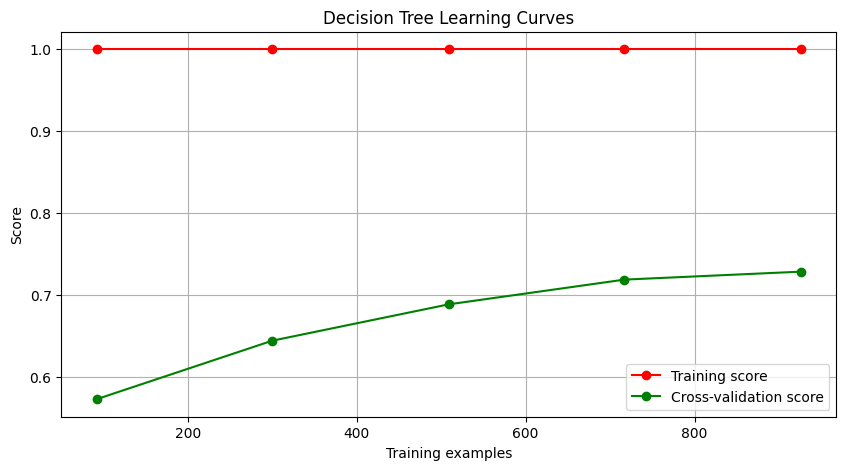

In [ ]:
# Task 2: Generate and visualize learning curves
# For Decision Tree
train_sizes, train_scores, test_scores = learning_curve(decision_tree_model, X_train, Y_train, cv=5)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 5))
plt.title("Decision Tree Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

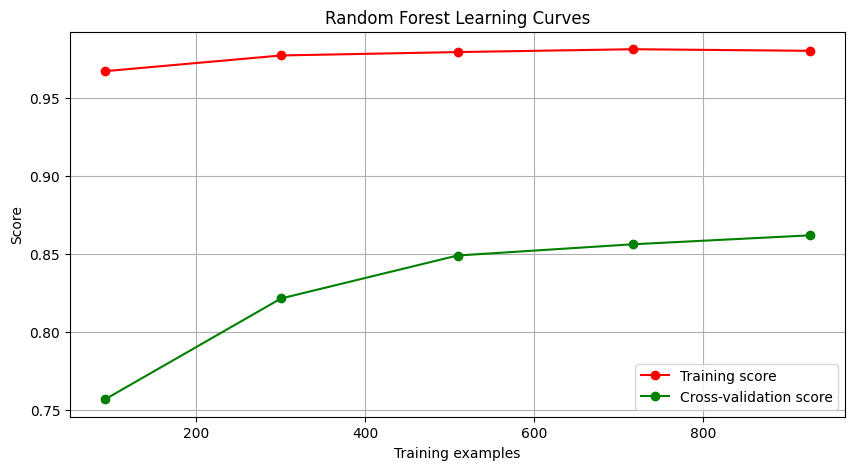

In [ ]:
# For Random Forest
train_sizes, train_scores, test_scores = learning_curve(random_forest_model, X_train, Y_train, cv=5)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 5))
plt.title("Random Forest Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

`Decision Tree:`

* Training Score: Learning curve untuk Decision Tree menunjukkan bahwa training score (akurasi pada data pelatihan) konsisten tinggi, mencapai nilai 1.0. Hal ini mengindikasikan bahwa Decision Tree mampu sempurna memfitting data pelatihan. Namun, perlu dicatat bahwa memiliki training score yang tinggi tidak selalu berarti model yang baik, karena bisa mengindikasikan overfitting pada data pelatihan.
* Cross-Validation Score: Awalnya, cross-validation score (akurasi pada data validasi silang) untuk Decision Tree berada di bawah 0.6. Namun, seiring dengan peningkatan jumlah data pelatihan, score cross-validation mulai naik secara signifikan. Akhirnya, score cross-validation stabil pada kisaran 0.7-0.8. Hal ini menunjukkan bahwa model Decision Tree lebih baik dalam membuat prediksi yang akurat ketika diberikan lebih banyak data pelatihan.

`Random Forest:`

* Training Score: Learning curve untuk Random Forest menunjukkan bahwa training score juga tinggi, dengan nilai di atas 0.95, dan terus meningkat. Hal ini mengindikasikan bahwa Random Forest dapat secara efektif memfitting data pelatihan, tetapi tidak sebesar Decision Tree.
* Cross-Validation Score: Awalnya, cross-validation score untuk Random Forest berada pada kisaran 0.75-0.80, yang lebih tinggi daripada Decision Tree. Kemudian, score cross-validation juga terus meningkat seiring dengan peningkatan jumlah data pelatihan, dan akhirnya stabil di kisaran 0.85-0.90. Ini menunjukkan bahwa Random Forest adalah model yang lebih stabil dan mampu menghasilkan prediksi yang akurat seiring dengan pertambahan data pelatihan.

`Kesimpulan:`

Decision Tree memiliki training score yang sempurna, tetapi memerlukan lebih banyak data pelatihan untuk meningkatkan score cross-validation.
Random Forest memiliki training score yang tinggi dan cross-validation score yang lebih baik daripada Decision Tree, menjadikannya pilihan yang lebih stabil dan akurat untuk masalah ini



---



# evaluation metrics and select the best metrics

In [ ]:
# Task 4: Measure evaluation metrics and select the best metrics
from sklearn.metrics import mean_squared_error, r2_score

# For Decision Tree
decision_tree_predictions = decision_tree_model.predict(X_test)
decision_tree_mse = mean_squared_error(Y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(Y_test, decision_tree_predictions)
print("Decision Tree Metrics:")
print(f"Mean Squared Error (MSE): {decision_tree_mse}")
print(f"R-squared (R2) Score: {decision_tree_r2}")

Decision Tree Metrics:
Mean Squared Error (MSE): 1213088715.3068964
R-squared (R2) Score: 0.8079157060303687


In [ ]:
# For Random Forest
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_mse = mean_squared_error(Y_test, random_forest_predictions)
random_forest_r2 = r2_score(Y_test, random_forest_predictions)
print("Random Forest Metrics:")
print(f"Mean Squared Error (MSE): {random_forest_mse}")
print(f"R-squared (R2) Score: {random_forest_r2}")

Random Forest Metrics:
Mean Squared Error (MSE): 534948534.90601826
R-squared (R2) Score: 0.9152945614439127




---



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for the Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],  # Example values, adjust as needed
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object
grid_search_dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=4), param_grid=param_grid_dt,
                              scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

# Perform the grid search
grid_search_dt.fit(X_train, Y_train)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_
best_decision_tree_model = grid_search_dt.best_estimator_

# Evaluate the best Decision Tree model
best_dt_predictions = best_decision_tree_model.predict(X_test)
best_dt_mae = mean_absolute_error(Y_test, best_dt_predictions)
best_dt_mse = mean_squared_error(Y_test, best_dt_predictions)

print("Best Decision Tree Model Metrics:")
print(f"Best Hyperparameters: {best_params_dt}")
print(f"MAE: {best_dt_mae}")
print(f"MSE: {best_dt_mse}")


Best Decision Tree Model Metrics:
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
MAE: 22824.024407498633
MSE: 1111726475.2258263


In [ ]:
# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Example values, adjust as needed
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_rf,
                              scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

# Perform the grid search
grid_search_rf.fit(X_train, Y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
best_random_forest_model = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model
best_rf_predictions = best_random_forest_model.predict(X_test)
best_rf_mae = mean_absolute_error(Y_test, best_rf_predictions)
best_rf_mse = mean_squared_error(Y_test, best_rf_predictions)

print("Best Random Forest Model Metrics:")
print(f"Best Hyperparameters: {best_params_rf}")
print(f"MAE: {best_rf_mae}")
print(f"MSE: {best_rf_mse}")


Best Random Forest Model Metrics:
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
MAE: 14958.495508734775
MSE: 527568385.16605836




---



# Conclusion & Insight

1. Perbaikan Model: Perbaikan model Decision Tree cukup berhasil dalam mengurangi Mean Squared Error (MSE) dan Mean Absolute Error (MAE), yang mengindikasikan peningkatan dalam akurasi prediksi. Hal ini disebabkan oleh penyetelan hyperparameter terbaik yang ditemukan untuk Decision Tree.

2. Kinerja Random Forest: Meskipun Decision Tree mengalami perbaikan, model Random Forest masih unggul dalam kinerja dengan MSE yang lebih rendah dan MAE yang lebih rendah. Ini menunjukkan bahwa Random Forest dengan hyperparameter terbaik juga berhasil dalam membuat prediksi yang lebih akurat.

3. Kedua model memiliki MAE yang lebih rendah setelah peningkatan, yang berarti mereka lebih dekat dalam memprediksi nilai aktual.

4. Random Forest memiliki performa yang lebih baik daripada Decision Tree setelah peningkatan, dengan MSE yang lebih rendah, yang mengindikasikan bahwa Random Forest lebih baik dalam mengurangi kesalahan prediksi.

5. Pentingnya Penyetelan Hyperparameter: Penyetelan hyperparameter memainkan peran penting dalam meningkatkan kinerja model. Model yang memiliki hyperparameter yang tepat dapat menghasilkan prediksi yang lebih baik.

* Kesimpulan Akhir: Setelah perbaikan model, model Decision Tree dan Random Forest dengan performa yang lebih baik daripada sebelumnya. Namun, dalam konteks ini, Random Forest dengan hyperparameter terbaik adalah pilihan terbaik karena memberikan prediksi yang paling akurat